In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [6]:
student_scores = pd.read_csv('datasets/student_performance.csv')

student_scores.sample(5)

,Hours Studied,Score Obtained,Outliers
67,587,88.533995,False
26,181,5.582973,False
79,766,98.510907,False
55,446,58.710249,False
120,991,99.898515,False


In [7]:
student_scores.shape

(122, 3)

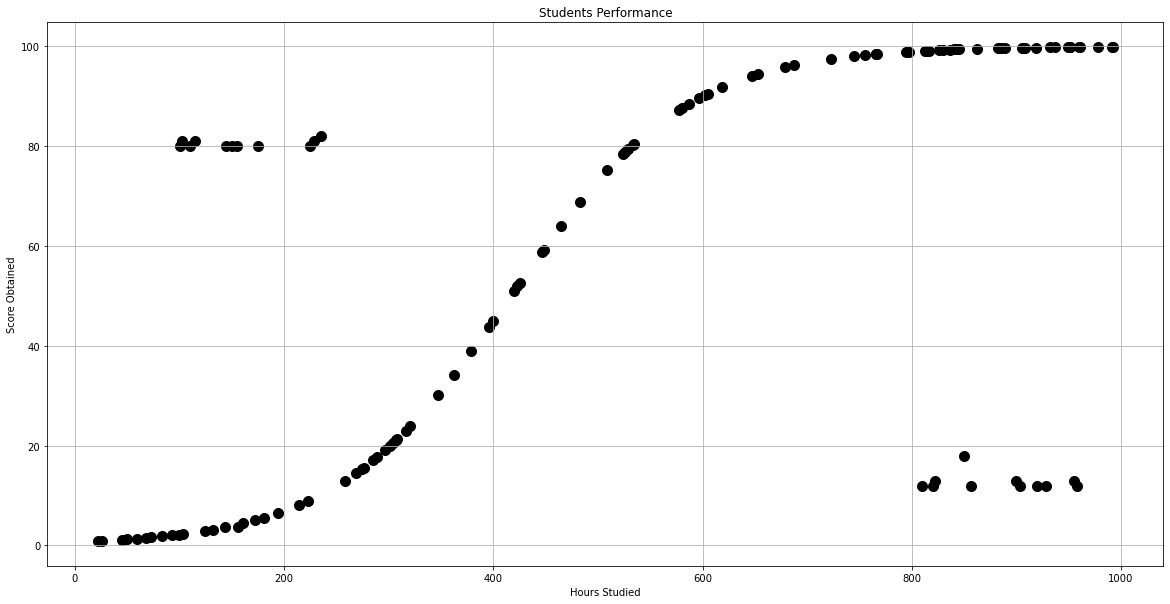

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           color='black',
           s=100)

ax.set(xlabel='Hours Studied',
      ylabel='Score Obtained',
      title='Students Performance')

ax.grid()

plt.show()

In [9]:
student_scores.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [10]:
X = student_scores.drop('Outliers', axis=1)

X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


In [11]:
from sklearn.neighbors import LocalOutlierFactor

In [12]:
lof = LocalOutlierFactor(n_neighbors=20,
                        contamination=0.2)

In [13]:
y_pred = lof.fit_predict(X)

y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [14]:
n_outliers = (y_pred == -1).sum()

n_outliers

25

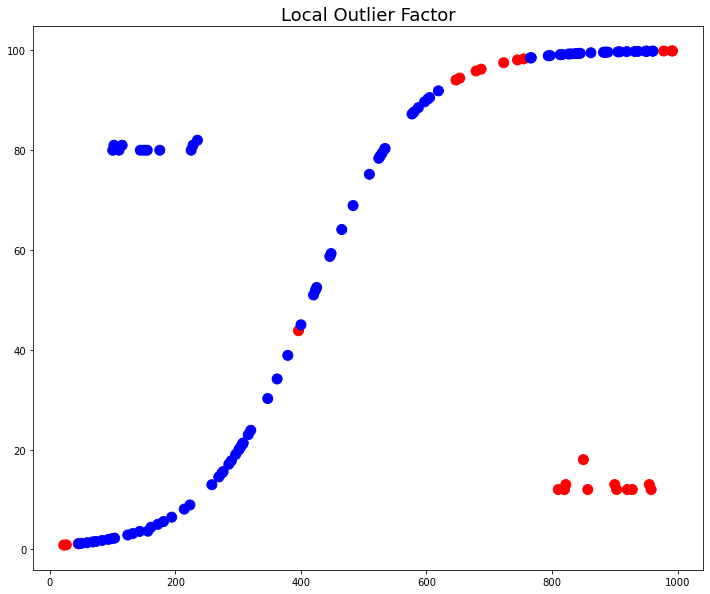

In [15]:
#Puntos Rojos ( Valores Atipicos)

colors = np.array(['r', 'b'])

plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()

In [16]:
X_scores = lof.negative_outlier_factor_

X_scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [17]:
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) 

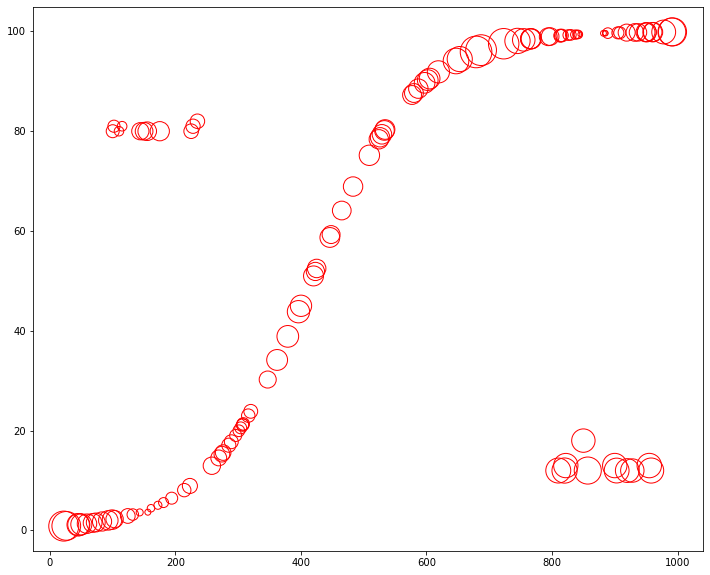

In [18]:
plt.figure(figsize=(12, 10))

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=1000 * radius,
           edgecolors='r',
           facecolors='none',
           label='Outlier scores')

plt.show()

# Outlier Detection Using Isolation Forest

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
isf = IsolationForest(random_state=None,
                     contamination=0.19)

In [21]:
y_pred = isf.fit_predict(X)

y_pred

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [22]:
n_outliers = (y_pred == -1).sum()

n_outliers

23

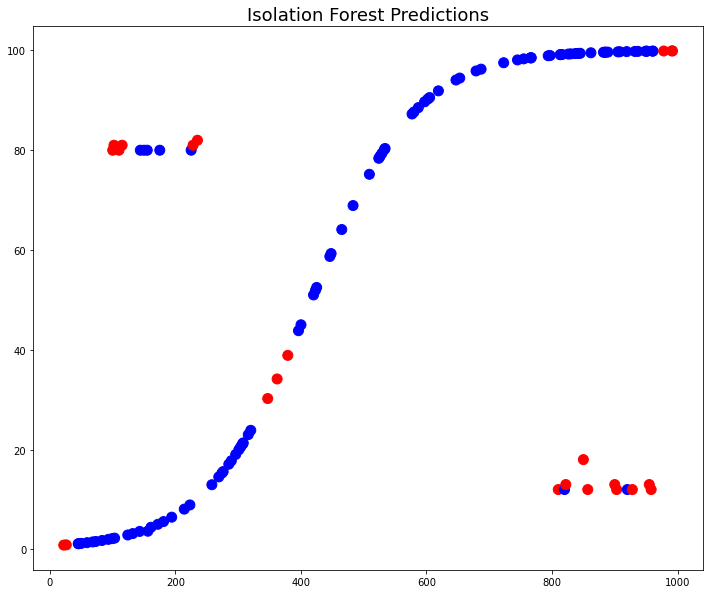

In [23]:
#Puntos Rojos ( Valores Atipicos)

colors = np.array(['r', 'b'])

plt.figure(figsize=(12, 10))

plt.title('Isolation Forest Predictions', size=18)

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()

In [24]:
student_scores.describe()

,Hours Studied,Score Obtained
count,122.000000,122.000000
mean,519.131148,56.665412
std,316.030884,39.929084
min,22.000000,0.869736
25%,225.750000,13.000000
50%,525.000000,78.582806
75%,829.000000,98.510907
max,992.000000,99.899724


In [25]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                    np.linspace(0, 102, 500))

print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


In [26]:
np.c_[xx.ravel(), yy.ravel()]

array([[   0.        ,    0.        ],
       [   2.0240481 ,    0.        ],
       [   4.04809619,    0.        ],
       ...,
       [1005.95190381,  102.        ],
       [1007.9759519 ,  102.        ],
       [1010.        ,  102.        ]])

In [27]:
Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

NameError: name 'z' is not defined

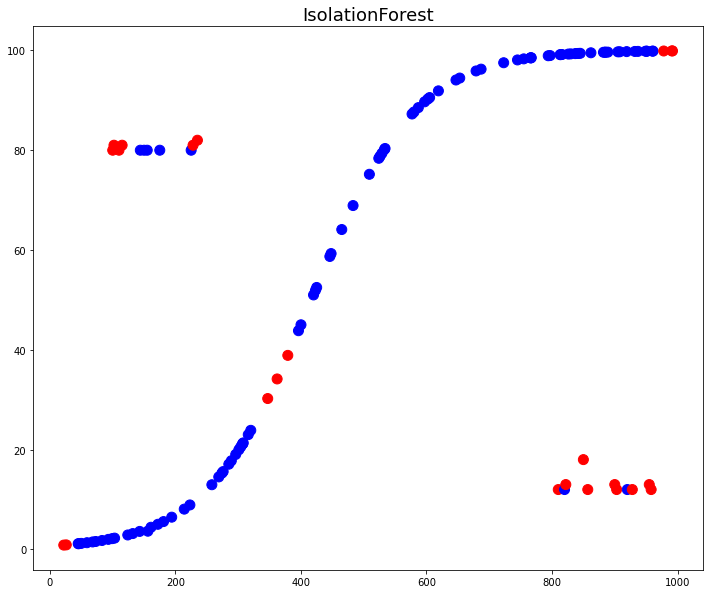

In [28]:
plt.figure(figsize=(12, 10))

plt.title('IsolationForest', size=18)

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, z,
           levels=[0],
           linewidths=2,
           colors='black')

plt.show()

# Todos los puntos dentro de la linea son valores internos(azul) y los
# que están fuera son valores atípicos(Rojo)

# Outlier Detection Using Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

In [ ]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)

In [29]:
y_pred = ee.fit_predict(X)

y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

In [30]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

In [31]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                    np.linspace(-5, 120, 500))

z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


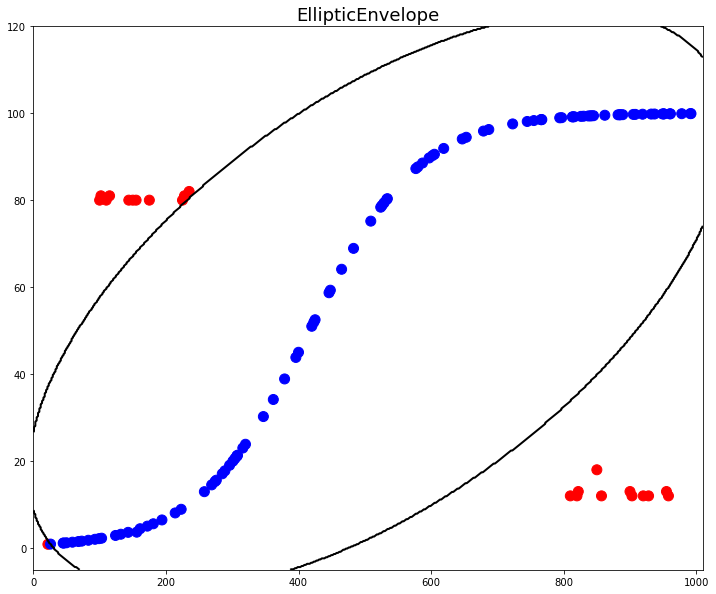

In [32]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

plt.scatter(student_scores['Hours Studied'],
           student_scores['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, z,
           levels=[0],
           linewidths=2,
           colors='black')

plt.show()

# Novelty Detection Using Local Outlier Factor

In [33]:
scores_dataset = pd.read_csv('datasets/student_performance_modified.csv')

scores_dataset.sample(10)

,Hours Studied,Score Obtained,Outliers,Training,Test
60,524,78.380848,False,0,1
44,308,21.349259,False,0,1
63,533,80.154838,False,1,0
32,235,82.000000,True,0,1
30,225,80.000000,True,0,1
12,102,81.000000,True,0,1
39,296,19.030956,False,1,0
50,396,43.831583,False,0,1
47,347,30.237790,False,1,0
91,830,99.303591,False,1,0


In [34]:
scores_dataset.shape

(122, 5)

In [35]:
x_training = scores_dataset.loc[scores_dataset['Training']==1]
x_training.head()

,Hours Studied,Score Obtained,Outliers,Training,Test
1,26,0.912112,False,1,0
3,46,1.156660,False,1,0
5,59,1.349299,False,1,0
7,73,1.592205,False,1,0
9,93,2.015385,False,1,0


In [36]:
x_training.shape

(50, 5)

In [37]:
x_training = x_training.drop(['Outliers', 'Training', 'Test'], axis=1)

x_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


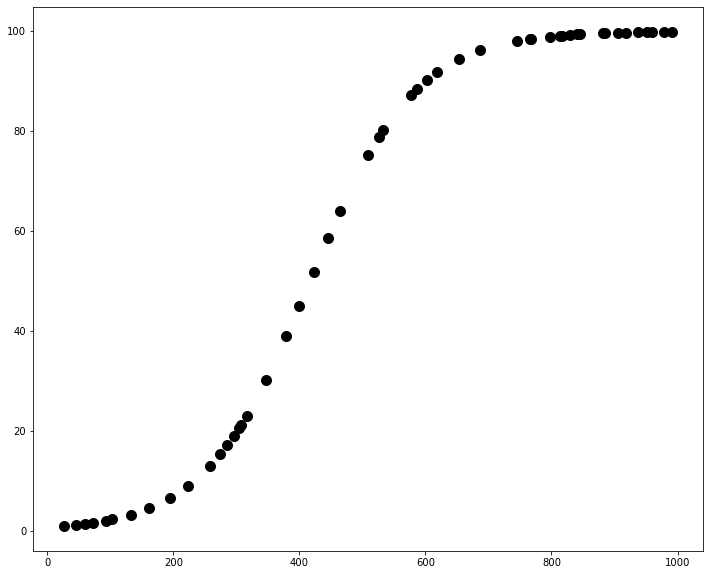

In [38]:
plt.figure(figsize=(12, 10))

plt.scatter(x_training['Hours Studied'],
           x_training['Score Obtained'],
           s=100,
           c='black')

plt.show()

In [39]:
x_testing = scores_dataset.loc[scores_dataset['Test']==1]

x_testing = x_testing.drop(['Outliers', 'Training', 'Test'], axis=1)

x_testing.head()

,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


In [41]:
x_testing.shape

(72, 2)

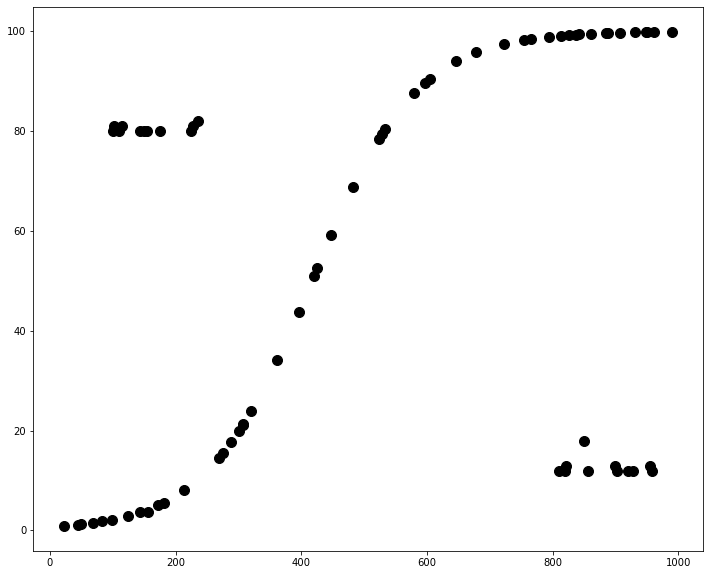

In [42]:
plt.figure(figsize=(12, 10))

plt.scatter(x_testing['Hours Studied'],
           x_testing['Score Obtained'],
           s=100,
           c='black')

plt.show()

In [43]:
lof_novelty = LocalOutlierFactor(n_neighbors=5,
                                contamination='auto',
                                novelty=True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [44]:
n_outliers = (y_pred == -1).sum()
n_outliers

14

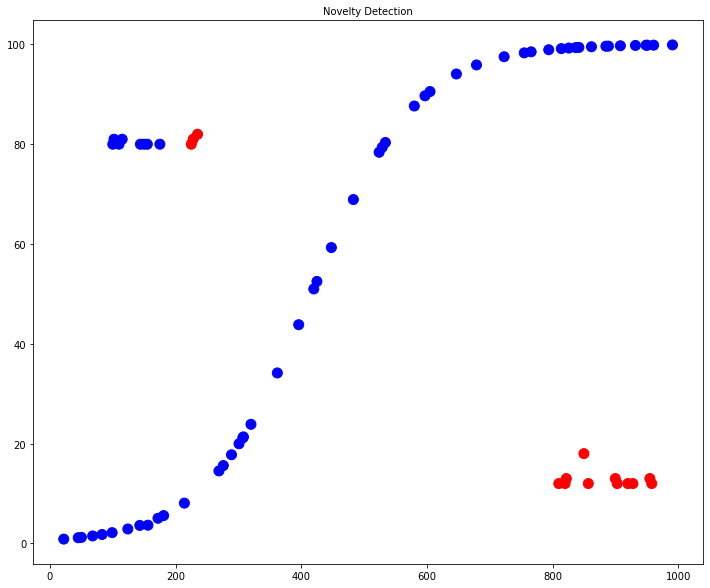

In [45]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=10)

plt.scatter(x_testing['Hours Studied'],
           x_testing['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()

In [46]:
lof_novelty = LocalOutlierFactor(n_neighbors=5,
                                contamination=0.01,
                                novelty=True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [47]:
n_outliers = (y_pred == -1).sum()
n_outliers

22

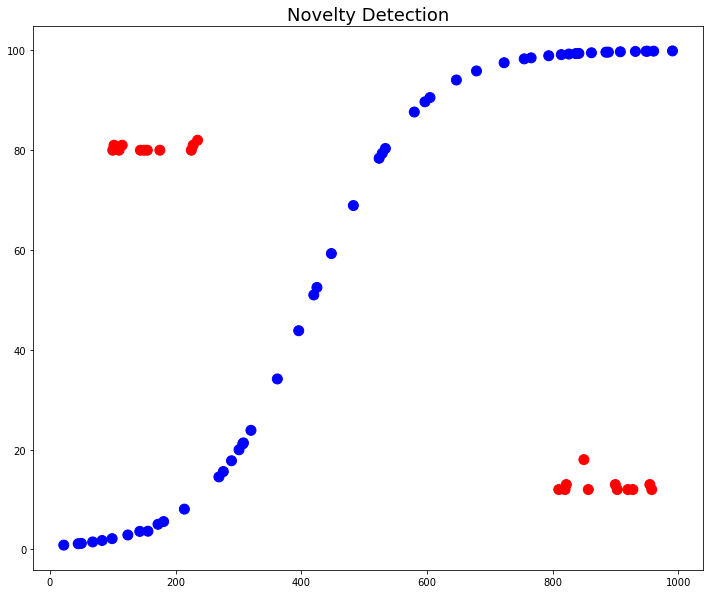

In [48]:
plt.figure(figsize=(12, 10))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'],
           x_testing['Score Obtained'],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()

In [50]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

In [51]:
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([1]), array([-1]))

In [52]:
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([-1.01386409]), array([-818.57692939]))

In [53]:
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


(array([0.39025402]), array([-817.17281128]))

In [54]:
isf.predict(INLIER), isf.predict(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([-1]), array([-1]))

In [55]:
isf.score_samples(INLIER), isf.score_samples(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(array([-0.5406982]), array([-0.55447709]))

In [56]:
ee.predict(INLIER), ee.predict(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([1]), array([-1]))

In [59]:
ee.score_samples(INLIER), ee.score_samples(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([-1.87453537]), array([-1503979.60043687]))

In [60]:
ee.decision_function(INLIER), ee.decision_function(OUTLIER)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(
C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


(array([0.92463624]), array([-1503976.80126526]))